## Zomato Restaurant EDA and recommender system

### Import necessary libraries  

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [91]:
#loading dataset
df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')

In [92]:
#dataset preview
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [93]:
#dataset dimensions 
df.shape

(9551, 21)

In [94]:
#dataset columns
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [95]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Descriptive Analysis

In [96]:
#sorting unique values of country code
sorted(df['Country Code'].unique())

[1, 14, 30, 37, 94, 148, 162, 166, 184, 189, 191, 208, 214, 215, 216]

<AxesSubplot:xlabel='Country Code', ylabel='count'>

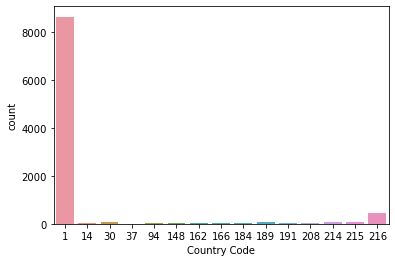

In [97]:
#countplot of country code
sns.countplot(x='Country Code',data=df)

In [98]:
#dataframe of country code and country name
df_country=pd.read_excel('Country-Code.xlsx')

In [99]:
#preview of dataframe
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


#### Observations:

1. As maximum count is of country code 1 i.e, India,and the rest are very small in number as compared to it ,so we decide to work upon only the Indian Restaurants
2. The columns country code and currency would be irrelevant as all the rows will contain same value of them ,so, we will drop these columns

In [100]:
#redefining dataframe such that it contains only indian restaurants
df=df[df['Country Code']==1]

In [101]:
#number of cities 
len(df['City'].unique())

43

In [102]:
#dropping irrelevant columns
df=df.drop(columns=['Currency','Country Code','Address','Restaurant ID'],axis=1).reset_index()

In [103]:
df.head()

,index,Restaurant Name,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,624,Jahanpanah,Agra,Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,No,No,No,No,3,3.9,Yellow,Good,140
1,625,Rangrezz Restaurant,Agra,Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,No,No,No,No,2,3.5,Yellow,Good,71
2,626,Time2Eat - Mama Chicken,Agra,Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,No,No,No,No,2,3.6,Yellow,Good,94
3,627,Chokho Jeeman Marwari Jain Bhojanalya,Agra,Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,No,No,No,No,2,4.0,Green,Very Good,87
4,628,Pinch Of Spice,Agra,Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,No,No,No,No,3,4.2,Green,Very Good,177


In [104]:
#dropping index column
df=df.drop(columns=['index'],axis=1)

In [105]:
#preview of changed dataset
df.head()

,Restaurant Name,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Jahanpanah,Agra,Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,No,No,No,No,3,3.9,Yellow,Good,140
1,Rangrezz Restaurant,Agra,Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,No,No,No,No,2,3.5,Yellow,Good,71
2,Time2Eat - Mama Chicken,Agra,Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,No,No,No,No,2,3.6,Yellow,Good,94
3,Chokho Jeeman Marwari Jain Bhojanalya,Agra,Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,No,No,No,No,2,4.0,Green,Very Good,87
4,Pinch Of Spice,Agra,Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,No,No,No,No,3,4.2,Green,Very Good,177


In [106]:
#dimension of changed dataset
df.shape

(8652, 17)

In [107]:
# checking the ratings
ratings=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings
#reset will rest tthe index and rename will change name

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2139
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,26
6,2.3,Red,Poor,46
7,2.4,Red,Poor,83
8,2.5,Orange,Average,109
9,2.6,Orange,Average,190


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

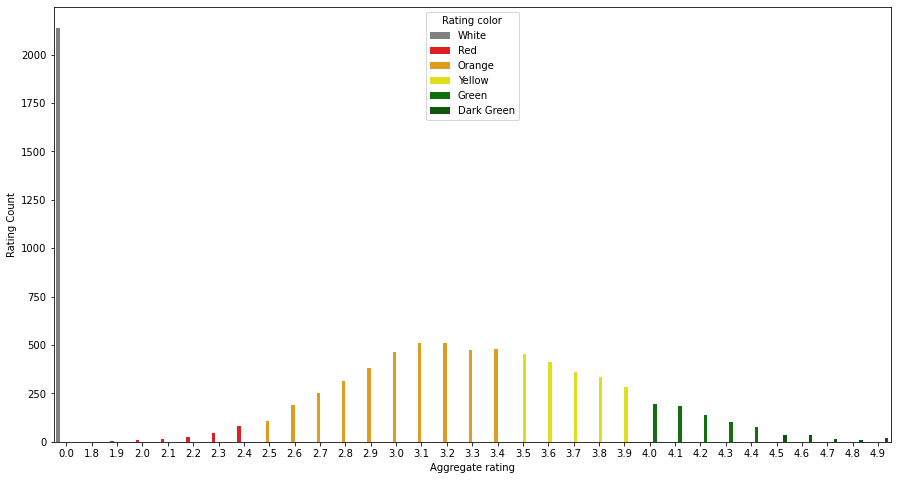

In [108]:
#barplot of aggragate rating vs rating count
plt.figure(figsize=(15,8))
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings,palette=['grey','red','orange','yellow','green','darkgreen'])

In [109]:
#checking for null values
df.isnull().sum()

Restaurant Name         0
City                    0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [110]:
#unique values of city
df['City'].unique()

array(['Agra', 'Ahmedabad', 'Allahabad', 'Amritsar', 'Aurangabad',
       'Bangalore', 'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Chennai',
       'Coimbatore', 'Dehradun', 'Faridabad', 'Ghaziabad', 'Goa',
       'Gurgaon', 'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Kanpur',
       'Kochi', 'Kolkata', 'Lucknow', 'Ludhiana', 'Mangalore', 'Mohali',
       'Mumbai', 'Mysore', 'Nagpur', 'Nashik', 'New Delhi', 'Noida',
       'Panchkula', 'Patna', 'Puducherry', 'Pune', 'Ranchi',
       'Secunderabad', 'Surat', 'Vadodara', 'Varanasi', 'Vizag'],
      dtype=object)

#### Observations:

1. Dataset does not contain any null values
2. Aggregate rating for most of the restaurants lies between 2.7-4.1 and also we have a large number of restaurant which are not rated and thus have rating 0
2. we have 43 unique cities and among them we will choose the top three counts and would work upon them

In [111]:
#creating a new list of city counts
li2=df["City"].value_counts().sort_values(ascending=False)

In [112]:
#preview of list
li2

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Chennai           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Jaipur            20
Coimbatore        20
Goa               20
Indore            20
Kochi             20
Kanpur            20
Vizag             20
Kolkata           20
Varanasi          20
Agra              20
Surat             20
Pune              20
Puducherry        20
Patna             20
Mangalore         20
Ranchi            20
Ludhiana          20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

In [113]:
df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad', 'Ahmedabad',
       'Guwahati', 'Lucknow', 'Bhubaneshwar', 'Amritsar', 'Pune', 'Puducherry',
       'Patna', 'Ludhiana', 'Ranchi', 'Surat', 'Vadodara', 'Nashik', 'Nagpur',
       'Mysore', 'Mumbai', 'Varanasi', 'Mangalore', 'Agra', 'Kochi', 'Kolkata',
       'Dehradun', 'Allahabad', 'Aurangabad', 'Bangalore', 'Bhopal', 'Chennai',
       'Coimbatore', 'Goa', 'Indore', 'Jaipur', 'Kanpur', 'Vizag',
       'Chandigarh', 'Hyderabad', 'Secunderabad', 'Panchkula', 'Mohali'],
      dtype='object')

In [114]:
city_values=df.City.value_counts().values
city_labels=df.City.value_counts().index

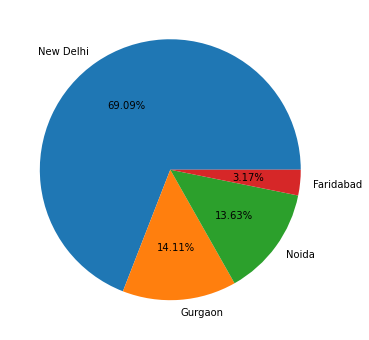

In [115]:
#piechart of city value counts
plt.figure(figsize=(6,6))
plt.pie(city_values[:4],labels=city_labels[:4],autopct='%1.2f%%')
plt.show()

Thus the top three cities are delhi,gurgaon and noida ,which cummulatively account for 96.54% of data which is a very significant number ,now we individually deal with these three cities

#### Delhi

In [116]:
#defining delhi dataframe
delhi_df=df[df['City']=='New Delhi'].reset_index()

In [117]:
delhi_df.head()

,index,Restaurant Name,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1936,Food Cloud,New Delhi,Aaya Nagar,"Aaya Nagar, New Delhi",0.000000,0.000000,Cuisine Varies,500,No,No,No,No,2,0.0,White,Not rated,2
1,1937,Burger.in,New Delhi,Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,350,No,Yes,No,No,1,3.2,Orange,Average,46
2,1938,Days of the Raj,New Delhi,Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",1500,Yes,Yes,No,No,3,3.4,Orange,Average,45
3,1939,Dilli Ka Dhaba,New Delhi,Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",500,No,No,No,No,2,2.6,Orange,Average,11
4,1940,Govardhan,New Delhi,Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",500,No,Yes,No,No,2,3.4,Orange,Average,238


In [118]:
#dropping irrelevant columns
delhi_df=delhi_df.drop(['index','Locality Verbose','City'],axis=1)

In [119]:
delhi_df.to_excel('Delhi.xlsx')

In [120]:
#checking number of unique cuisines
len(delhi_df['Cuisines'].unique())

892

In [183]:
result = delhi_df[
        (delhi_df['Cuisines'].str.contains('North')) &
        (delhi_df['Locality'].str.contains('Kamla')) &
        (delhi_df['Average Cost for two'].between(0,500))
    ][['Restaurant Name', 'Aggregate rating']]

result = result.sort_values(by='Aggregate rating', ascending=False)
result = result.reset_index(drop=True)
result

,Restaurant Name,Aggregate rating
0,Sid's Kitchen,3.8
1,Om Di Hatti,3.7
2,Veg Ex,3.6
3,Badri Prasad Ramesh Kumar Caterers,3.5
4,Ved Dhaba,3.5
5,Twenty Four Seven,3.3
6,BTW,3.1
7,Punjabi Chaap Corner,2.9
8,Maakhansingh,2.9
9,Annapurna Restaurant,2.5


In [185]:
#fetching restaurant name and rating when locality,cuisine,and average cost for two is known according to maximum rating 
result=delhi_df[(delhi_df['Cuisines'].str.contains('North'))&(delhi_df['Locality'].str.contains('Kamla'))&(delhi_df['Average Cost for two'].between(600, 800))][['Restaurant Name','Aggregate rating']]
result=result.sort_values(by='Aggregate rating',ascending=False)
result.reset_index(drop=True,inplace=True)
result

,Restaurant Name,Aggregate rating
0,Chill'm Bar & Cafe,4.2
1,Deez Biryani & Kebabs,3.7
2,Orange Tree Cafe,3.5
3,Shree Rathnam,3.5
4,Tikka Junction,3.4
5,Chawla's Chic Inn,3.3
6,Midnight Hunger Hub,3.3
7,Pradhan Ji Multi Cuisine Restaurant,3.3
8,Manwhar,3.2
9,Nine 75 Lounge & Bar,3.2


In [124]:
#unique localities of delhi
delhi_df['Locality'].unique()

array(['Aaya Nagar', 'Adchini', 'Aditya Mega Mall, Karkardooma',
       'Aerocity', 'Aggarwal City Mall, Pitampura',
       'Aggarwal City Plaza, Rohini', 'Alaknanda',
       'Ambience Mall, Vasant Kunj', 'Anand Lok', 'Anand Vihar',
       'Andaz Delhi, Aerocity', 'Ansal Plaza Mall, Khel Gaon Marg',
       'ARSS Mall, Paschim Vihar', 'Asaf Ali Road', 'Ashok Vihar Phase 1',
       'Ashok Vihar Phase 2', 'Ashok Vihar Phase 3', 'Barakhamba Road',
       'Basant Lok Market, Vasant Vihar', 'Bellagio, Ashok Vihar Phase 2',
       'Best Western Taurus Hotel, Mahipalpur', 'Bhikaji Cama Place',
       'Centaur Hotel, Aerocity', 'Chanakyapuri', 'Chander Nagar',
       'Chandni Chowk', 'Chawri Bazar', 'Chhatarpur', 'Chittaranjan Park',
       'City Centre Mall, Rohini', 'City Square Mall, Rajouri Garden',
       'Civil Lines', 'Community Centre, New Friends Colony',
       'Connaught Place', 'Crescent Square Mall, Rohini',
       'Cross River Mall, Karkardooma', 'Crowne Plaza Hotel, Rohini',
    

In [125]:
#top 5 rated restaurant in delhi
top_5_rated = delhi_df.sort_values(by='Aggregate rating', ascending=False).head(5)
top_5_rated

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
453,Naturals Ice Cream,Connaught Place,77.222148,28.634348,Ice Cream,150,No,Yes,No,No,1,4.9,Dark Green,Excellent,2620
1041,Indian Accent - The Manor,Friends Colony,77.257106,28.570142,Modern Indian,4000,No,No,No,No,4,4.9,Dark Green,Excellent,1934
1738,Masala Library,Janpath,77.218645,28.618245,Modern Indian,5000,No,No,No,No,4,4.9,Dark Green,Excellent,408
4096,Kopper Kadai,Rajouri Garden,77.119547,28.647627,North Indian,1400,No,No,No,No,3,4.8,Dark Green,Excellent,83
452,MOB Brewpub,Connaught Place,77.222642,28.633276,"Continental, Italian, Asian, Indian",1500,No,No,No,No,3,4.7,Dark Green,Excellent,52


In [126]:
#bottom 5 rated restaurant in delhi
bottom_5_rated = delhi_df[delhi_df['Rating text'] != 'Not rated'].sort_values(by='Aggregate rating', ascending=True).head(5)
bottom_5_rated

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1664,Muffins,Janakpuri,77.091798,28.627836,"Bakery, Fast Food",250,No,No,No,No,1,1.9,Red,Poor,66
4947,Subway,"The India Mall, New Friends Colony",77.268517,28.561470,"American, Fast Food, Salad, Healthy Food",500,No,Yes,No,No,2,1.9,Red,Poor,146
2637,New Baba Da Dhaba,Malviya Nagar,77.217028,28.533122,"North Indian, Mughlai, Chinese",400,No,Yes,No,No,1,2.0,Red,Poor,84
5146,Yo! China,"V3S Mall, Laxmi Nagar",77.286034,28.636704,Chinese,900,Yes,Yes,No,No,2,2.0,Red,Poor,191
4358,Wah Ji Wah,Saket,77.206467,28.524932,"North Indian, Chinese",450,No,Yes,No,No,1,2.1,Red,Poor,112


In [127]:
#total number of branches of dominoes and their locality in delhi
delhi_df[delhi_df['Restaurant Name'].str.contains('Domino')]

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
16,Domino's Pizza,"Aditya Mega Mall, Karkardooma",77.301634,28.656453,"Pizza, Fast Food",700,No,No,No,No,2,2.8,Orange,Average,83
184,Domino's Pizza,Ashok Vihar Phase 3,77.177817,28.692417,"Pizza, Fast Food",700,No,No,No,No,2,3.2,Orange,Average,101
210,Domino's Pizza,"Basant Lok Market, Vasant Vihar",77.164546,28.557597,"Pizza, Fast Food",700,No,No,No,No,2,3.3,Orange,Average,90
234,Domino's Pizza,Bhikaji Cama Place,77.188949,28.569022,"Pizza, Fast Food",700,No,No,No,No,2,2.4,Red,Poor,71
271,Domino's Pizza,Chander Nagar,77.277776,28.651989,"Pizza, Fast Food",700,No,No,No,No,2,3.0,Orange,Average,10
471,Domino's Pizza,Connaught Place,77.222896,28.633231,"Pizza, Fast Food",700,No,No,No,No,2,3.7,Yellow,Good,336
620,Domino's Pizza,Daryaganj,77.240214,28.644056,"Pizza, Fast Food",700,No,No,No,No,2,2.3,Red,Poor,32
635,Domino's Pizza,Defence Colony,77.233061,28.566159,"Pizza, Fast Food",700,No,No,No,No,2,2.5,Orange,Average,78
722,Domino's Pizza,Delhi University-GTB Nagar,77.205830,28.698599,"Pizza, Fast Food",700,No,No,No,No,2,2.5,Orange,Average,109
808,Domino's Pizza,Dilshad Garden,77.321958,28.676068,"Pizza, Fast Food",700,No,No,No,No,2,3.3,Orange,Average,87


<AxesSubplot:xlabel='count', ylabel='Locality'>

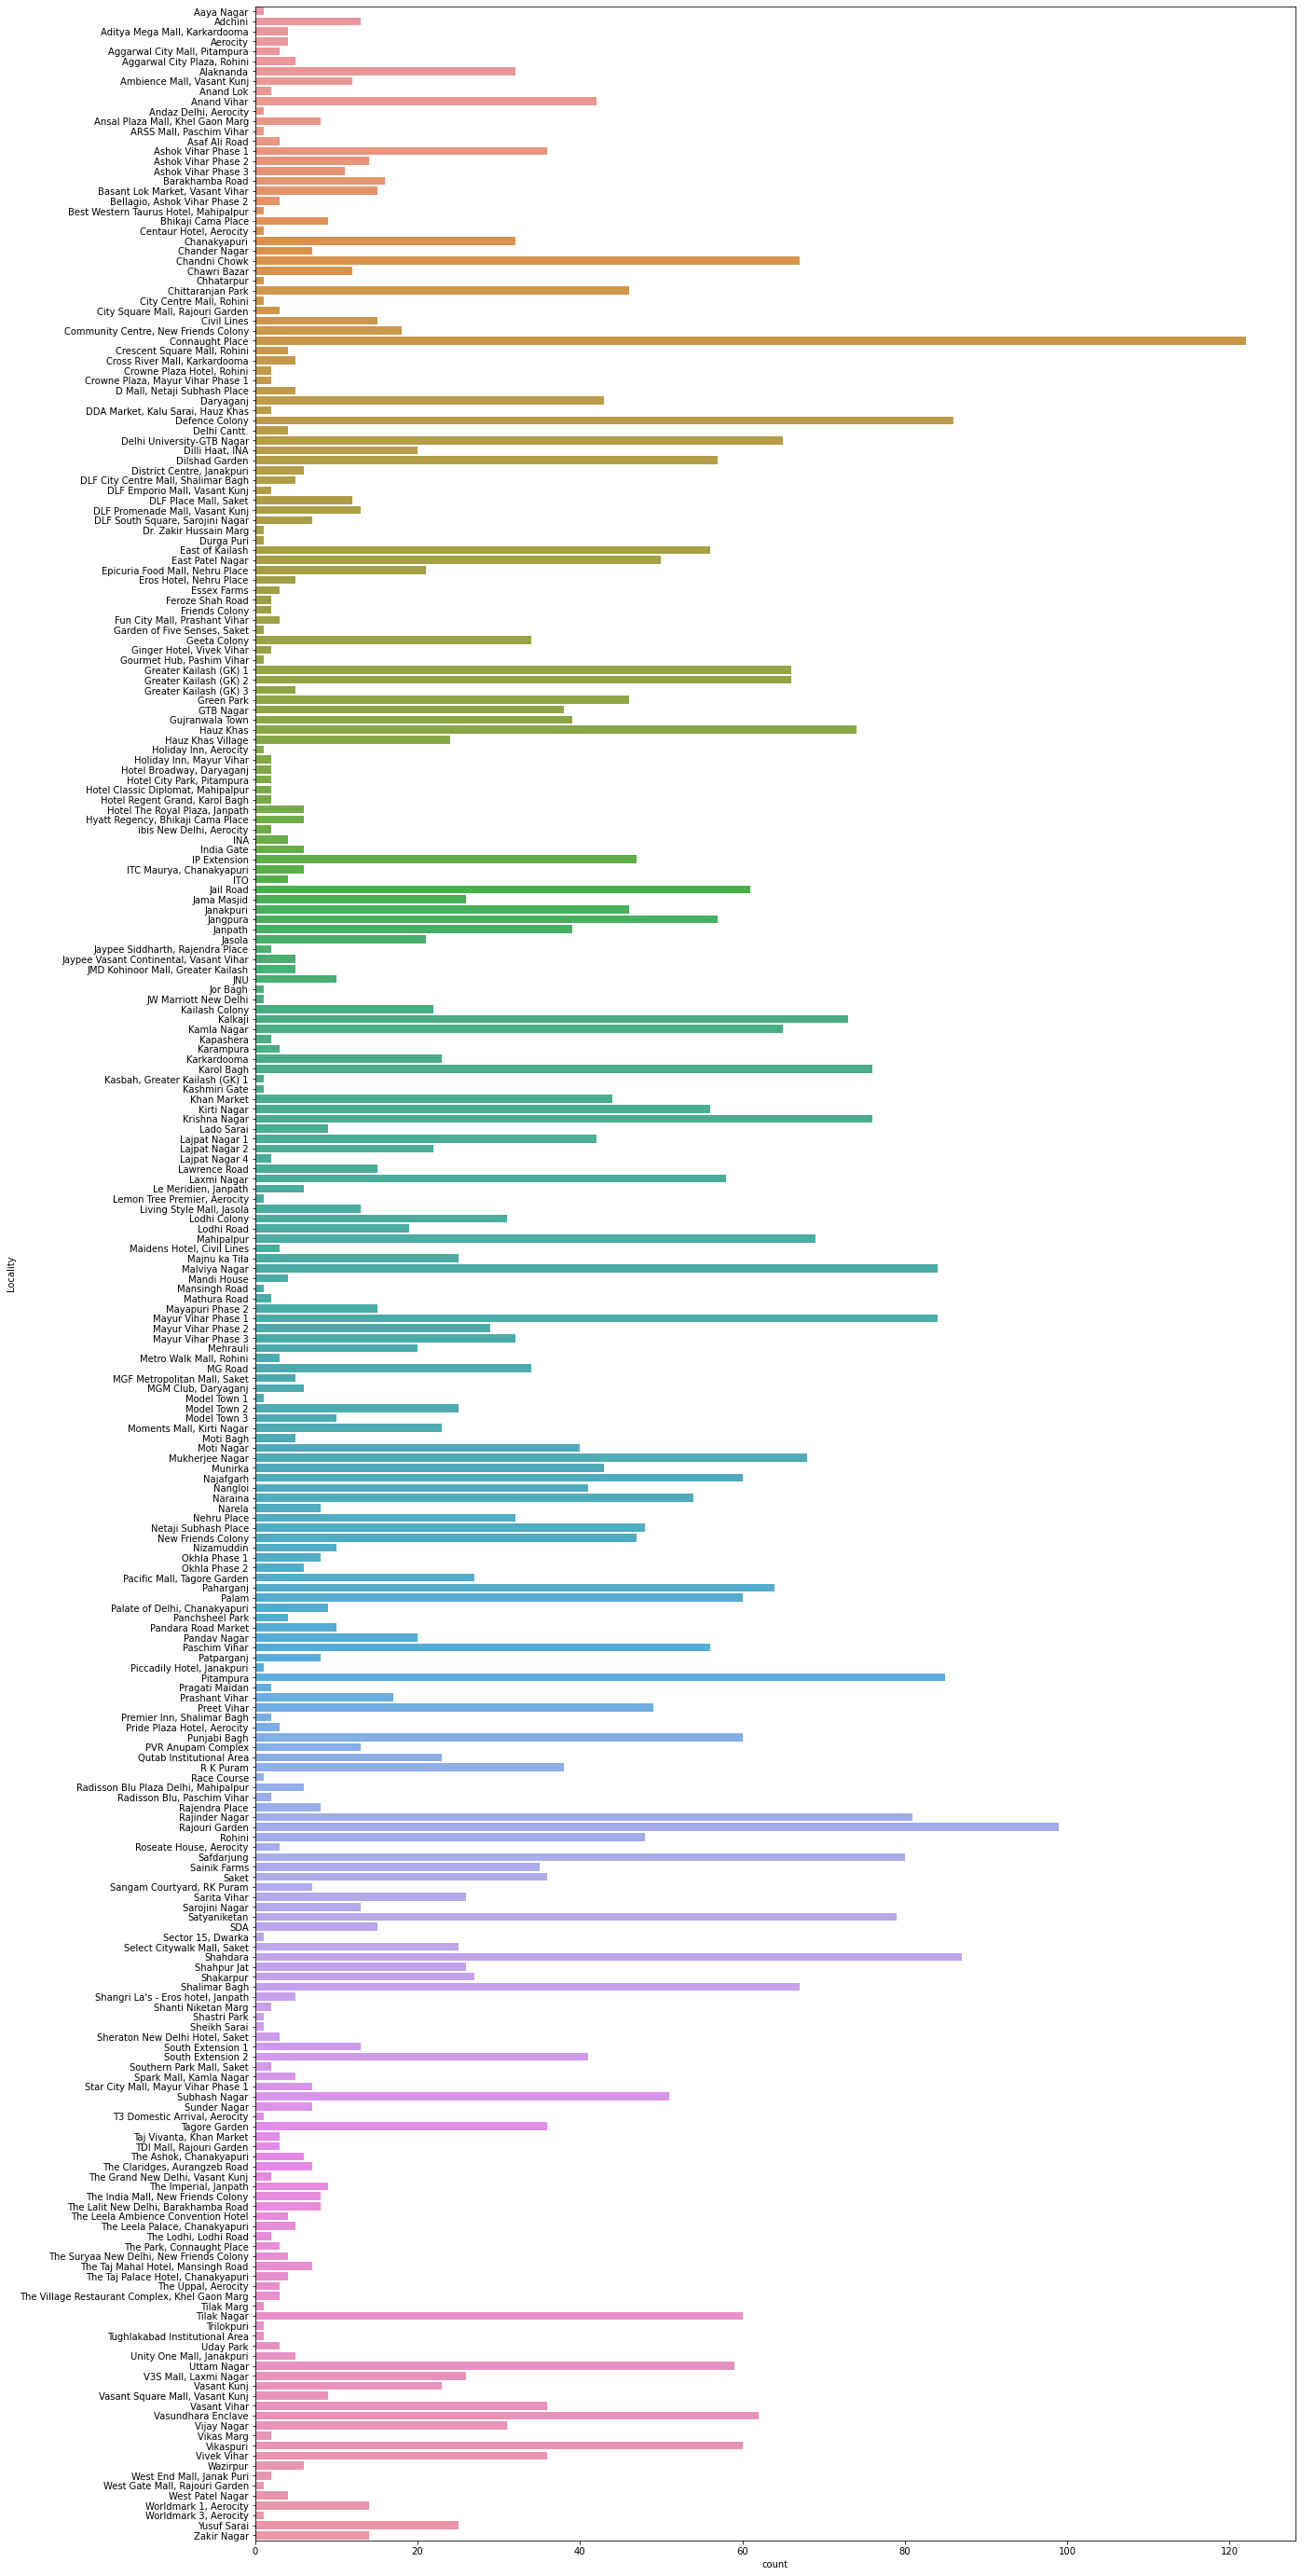

In [128]:
#countplot of all the localities
plt.figure(figsize=(20,50))
sns.countplot(y='Locality',data=delhi_df,orient='h')

In [129]:
#count of number of restaurant in top 30 loacality
category_counts=delhi_df['Locality'].value_counts().sort_values(ascending=False).head(30)

In [130]:
category_counts

Connaught Place               122
Rajouri Garden                 99
Shahdara                       87
Defence Colony                 86
Pitampura                      85
Malviya Nagar                  84
Mayur Vihar Phase 1            84
Rajinder Nagar                 81
Safdarjung                     80
Satyaniketan                   79
Karol Bagh                     76
Krishna Nagar                  76
Hauz Khas                      74
Kalkaji                        73
Mahipalpur                     69
Mukherjee Nagar                68
Chandni Chowk                  67
Shalimar Bagh                  67
Greater Kailash (GK) 1         66
Greater Kailash (GK) 2         66
Kamla Nagar                    65
Delhi University-GTB Nagar     65
Paharganj                      64
Vasundhara Enclave             62
Jail Road                      61
Najafgarh                      60
Vikaspuri                      60
Palam                          60
Punjabi Bagh                   60
Tilak Nagar   

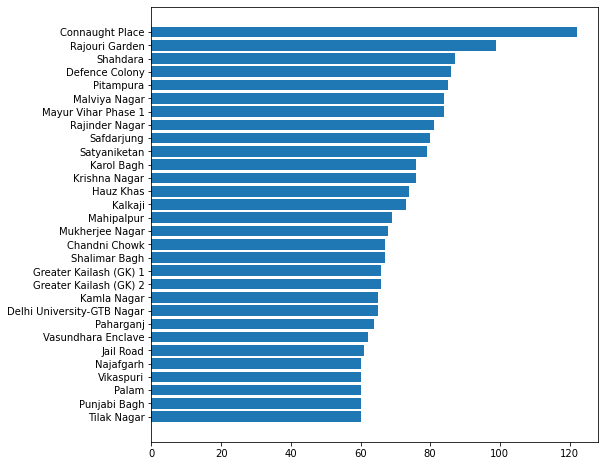

In [131]:
#countplot of top 30 lacalities 
plt.figure(figsize=(8,8))
plt.barh(category_counts.index,category_counts)
plt.gca().invert_yaxis()
plt.show()

In [132]:
#cuisines value counts
delhi_df.Cuisines.value_counts().index

Index(['North Indian', 'North Indian, Chinese', 'Fast Food', 'Chinese',
       'North Indian, Mughlai', 'Cafe', 'Street Food', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts',
       ...
       'Italian, Chinese, Fast Food, North Indian', 'Mughlai, Afghani',
       'North Indian, Mughlai, South Indian', 'North Indian, Afghani',
       'South Indian, Street Food, Chinese', 'North Indian, Fast Food, Bihari',
       'Modern Indian, North Indian', 'Cafe, Desserts, Healthy Food, Juices',
       'Italian, Mediterranean', 'Awadhi'],
      dtype='object', length=892)

In [133]:
Cuisines_values=delhi_df.Cuisines.value_counts().values
Cuisines_labels=delhi_df.Cuisines.value_counts().index

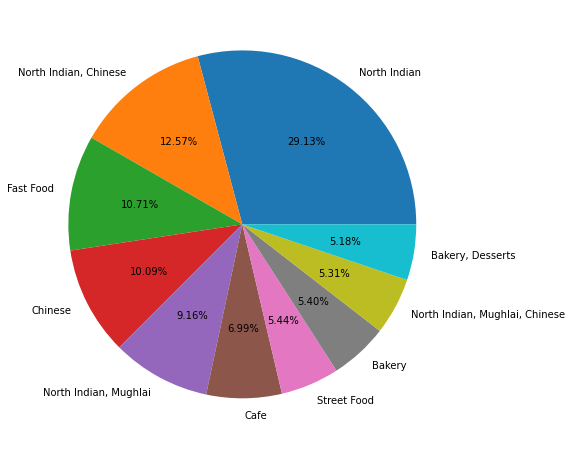

In [134]:
#pie chart of cuisines
plt.figure(figsize=(8,8))
plt.pie(Cuisines_values[:10],labels=Cuisines_labels[:10],autopct='%1.2f%%')
plt.show()

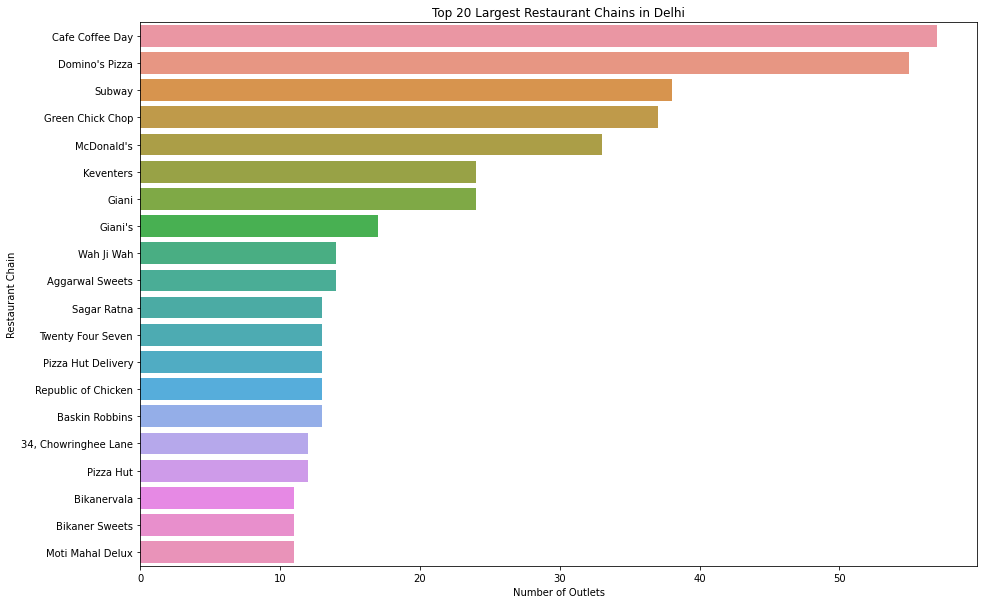

In [191]:
chains = delhi_df['Restaurant Name'].value_counts()[:90]
top_20_chains = chains[:20]

plt.figure(figsize=(15, 10))
sns.barplot(x=top_20_chains, y=top_20_chains.index)
plt.title("Top 20 Largest Restaurant Chains in Delhi")
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Chain")
plt.show()

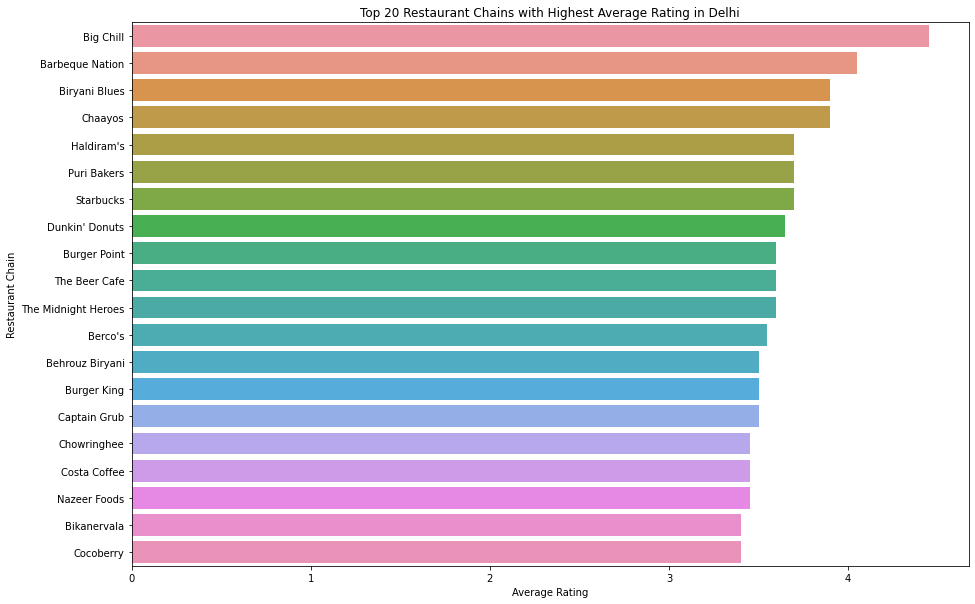

In [192]:
#plot of maximum rated restaurant in delhi
avg_ratings = delhi_df[delhi_df['Restaurant Name'].isin(chains.index)].groupby('Restaurant Name')['Aggregate rating'].median()
top_20_rated = avg_ratings.nlargest(20)
plt.figure(figsize=(15, 10))
sns.barplot(x=top_20_rated, y=top_20_rated.index)
plt.title("Top 20 Restaurant Chains with Highest Average Rating in Delhi")
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chain")
plt.show()

#### Observations:

1. Naturals Icecream, Indian Accent, Masala Library are the top rated restaurants and Muffins, Subway are least rated restaurants in Delhi
2. Connaught Place has maximum number of restaurants followed by Rajouri Garden and Shahdara
3. North Indian is the most offered cuisine follwed by Chinese and Fast Food
4. Cafe Coffee day is the largest restaurant chain with maximum number of outlets folllowed by Domino's and Subway
5. Big Chill, Barbeque Nation, Biryani Blues are the highest rated restaurant chains in Delhi

In [137]:
#recommend function for restaurant in delhi
def recommend_delhi(locality,cuisine,p1,p2):
    result=delhi_df[(delhi_df['Cuisines'].str.contains(cuisine))&(delhi_df['Locality'].str.contains(locality))&(delhi_df['Average Cost for two'].between(p1,p2))][['Restaurant Name','Aggregate rating']]
    result=result.sort_values(by='Aggregate rating',ascending=False)
    result=result.reset_index(drop=True)
    
    return(result)

In [138]:
#calling function
recommend_delhi('Kamla','North',600,800)

,Restaurant Name,Aggregate rating
0,Chill'm Bar & Cafe,4.2
1,Deez Biryani & Kebabs,3.7
2,Orange Tree Cafe,3.5
3,Shree Rathnam,3.5
4,Tikka Junction,3.4
5,Chawla's Chic Inn,3.3
6,Midnight Hunger Hub,3.3
7,Pradhan Ji Multi Cuisine Restaurant,3.3
8,Manwhar,3.2
9,Nine 75 Lounge & Bar,3.2


In [139]:
#pickle file of the dataframe
import pickle
with open('delhi.pkl','wb') as file:
    pickle.dump(delhi_df,file)

#### Gurgaon

In [140]:
#defining gurgaon dataframe
gurgaon_df=df[df['City']=='Gurgaon']

In [141]:
#preview of dataset
gurgaon_df=gurgaon_df.reset_index()
gurgaon_df=gurgaon_df.drop(['index','Locality Verbose','City'],axis=1)
gurgaon_df.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",350,No,No,No,No,1,3.4,Orange,Average,16
1,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",800,Yes,Yes,No,No,2,2.7,Orange,Average,80
2,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",2000,Yes,Yes,No,No,4,4.3,Green,Very Good,1887
3,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",1400,Yes,Yes,No,No,3,4.0,Green,Very Good,802
4,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,250,No,No,No,No,1,3.0,Orange,Average,4


In [142]:
gurgaon_df.to_excel('Gurgaon.xlsx')

In [193]:
#fetching restaurant name and aggregate rating when loacality,cuisine and average cost for two is given according to maximum rating
result=gurgaon_df[(gurgaon_df['Cuisines'].str.contains('Fast'))&(gurgaon_df['Locality'].str.contains('DLF'))&(gurgaon_df['Average Cost for two'].between(600, 900))][['Restaurant Name','Aggregate rating']]
result=result.sort_values(by='Aggregate rating',ascending=False)
result.reset_index(drop=True,inplace=True)
result

,Restaurant Name,Aggregate rating
0,Bun Intended,4.2
1,Pizza Central,4.1
2,Instapizza,4.0
3,Monty's Chicken Wings,3.9
4,Dunkin' Donuts,3.8
5,Instapizza,3.6
6,Le Marche Sugar & Spice Cafe,3.5
7,Tasty Fare,3.4
8,Kwaliti,3.3
9,Eat All Nite,3.2


In [144]:
#number of unique cuisines
len(gurgaon_df['Cuisines'].unique())

362

In [145]:
#unique localities
gurgaon_df['Locality'].unique()

array([' ILD Trade Centre Mall, Sohna Road', 'Ambience Mall, Gurgaon',
       'Ansal Plaza Mall, Palam Vihar', 'Ardee City',
       'Best Western Skycity Hotel, Sector 15, Gurgaon',
       'Central Arcade, DLF Phase 2, Gurgaon',
       'Central Plaza Mall, Golf Course Road',
       'Country Inn & Suites by Carlson, Gurgaon',
       'Country Inn & Suites by Carlson, Sector 12',
       'Country Inn & Suites By Carlson, Udyog Vihar',
       'Country Inn & Suites, Sohna Road',
       'Courtyard by Marriott, Sushant Lok',
       'Cross Point Mall, DLF Phase 4', 'Crowne Plaza, Sector 29',
       'Cyber Greens, DLF Cyber City', 'Cyber Hub, DLF Cyber City',
       'DLF Cyber City', 'DLF Galleria, DLF Phase 4',
       'DLF Mega Mall, DLF Phase 1', 'DLF Phase 1', 'DLF Phase 2',
       'DLF Phase 3', 'DLF Phase 4', 'DLF Phase 5',
       'DLF South Point Mall, Golf Course Road',
       'DLF Star Mall, Sector 30', 'DoubleTree by Hilton, Sector 56',
       'DT City Centre Mall, MG Road', 'DT Mega Ma

In [146]:
#top 5 rated restaurant in gurgaon
top_5_rated = gurgaon_df.sort_values(by='Aggregate rating', ascending=False).head(5)
top_5_rated

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
220,Caterspoint,DLF Phase 3,77.103974,28.487264,"Mexican, American, Healthy Food",500,No,Yes,No,No,2,4.9,Dark Green,Excellent,223
677,Matchbox,Sector 29,77.062607,28.468227,"Continental, North Indian, Chinese",1500,Yes,No,No,No,3,4.8,Dark Green,Excellent,245
678,Prankster,Sector 29,77.063357,28.469166,"Modern Indian, North Indian",1500,Yes,No,No,No,3,4.8,Dark Green,Excellent,1478
676,feel ALIVE,Sector 29,77.064137,28.467926,"North Indian, American, Asian, Biryani",1200,Yes,No,No,No,3,4.7,Dark Green,Excellent,69
303,Manhattan Brewery & Bar Exchange,"Global Foyer Mall, Golf Course Road",77.095027,28.460271,"Finger Food, American, Continental, North Indi...",2000,No,No,No,No,4,4.6,Dark Green,Excellent,2093


In [147]:
#bottom 5 rated restaurant in gurgaon
bottom_5_rated = gurgaon_df[gurgaon_df['Rating text'] != 'Not rated'].sort_values(by='Aggregate rating', ascending=True).head(5)
bottom_5_rated

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
234,Aahar,DLF Phase 3,77.094326,28.492384,"North Indian, South Indian, Chinese",400,No,Yes,No,No,1,2.0,Red,Poor,60
235,Chicken Bytes,DLF Phase 3,77.094263,28.492337,"North Indian, Mughlai, Chinese",500,No,Yes,No,No,2,2.1,Red,Poor,34
422,Suburbia - The Empire,"MGF Metropolitan Mall, MG Road",77.080235,28.481128,"Continental, European, North Indian",1800,Yes,No,No,No,3,2.1,Red,Poor,90
468,Pizza Hut Delivery,"Omaxe Celebration Mall, Sohna Road, Gurgaon",77.043268,28.410956,"Italian, Pizza, Fast Food",800,No,Yes,No,No,2,2.2,Red,Poor,93
1116,Wah Ji Wah,"Vyapar Kendra, Sushant Lok",77.083226,28.460573,North Indian,400,No,Yes,No,No,1,2.2,Red,Poor,142


<AxesSubplot:xlabel='count', ylabel='Locality'>

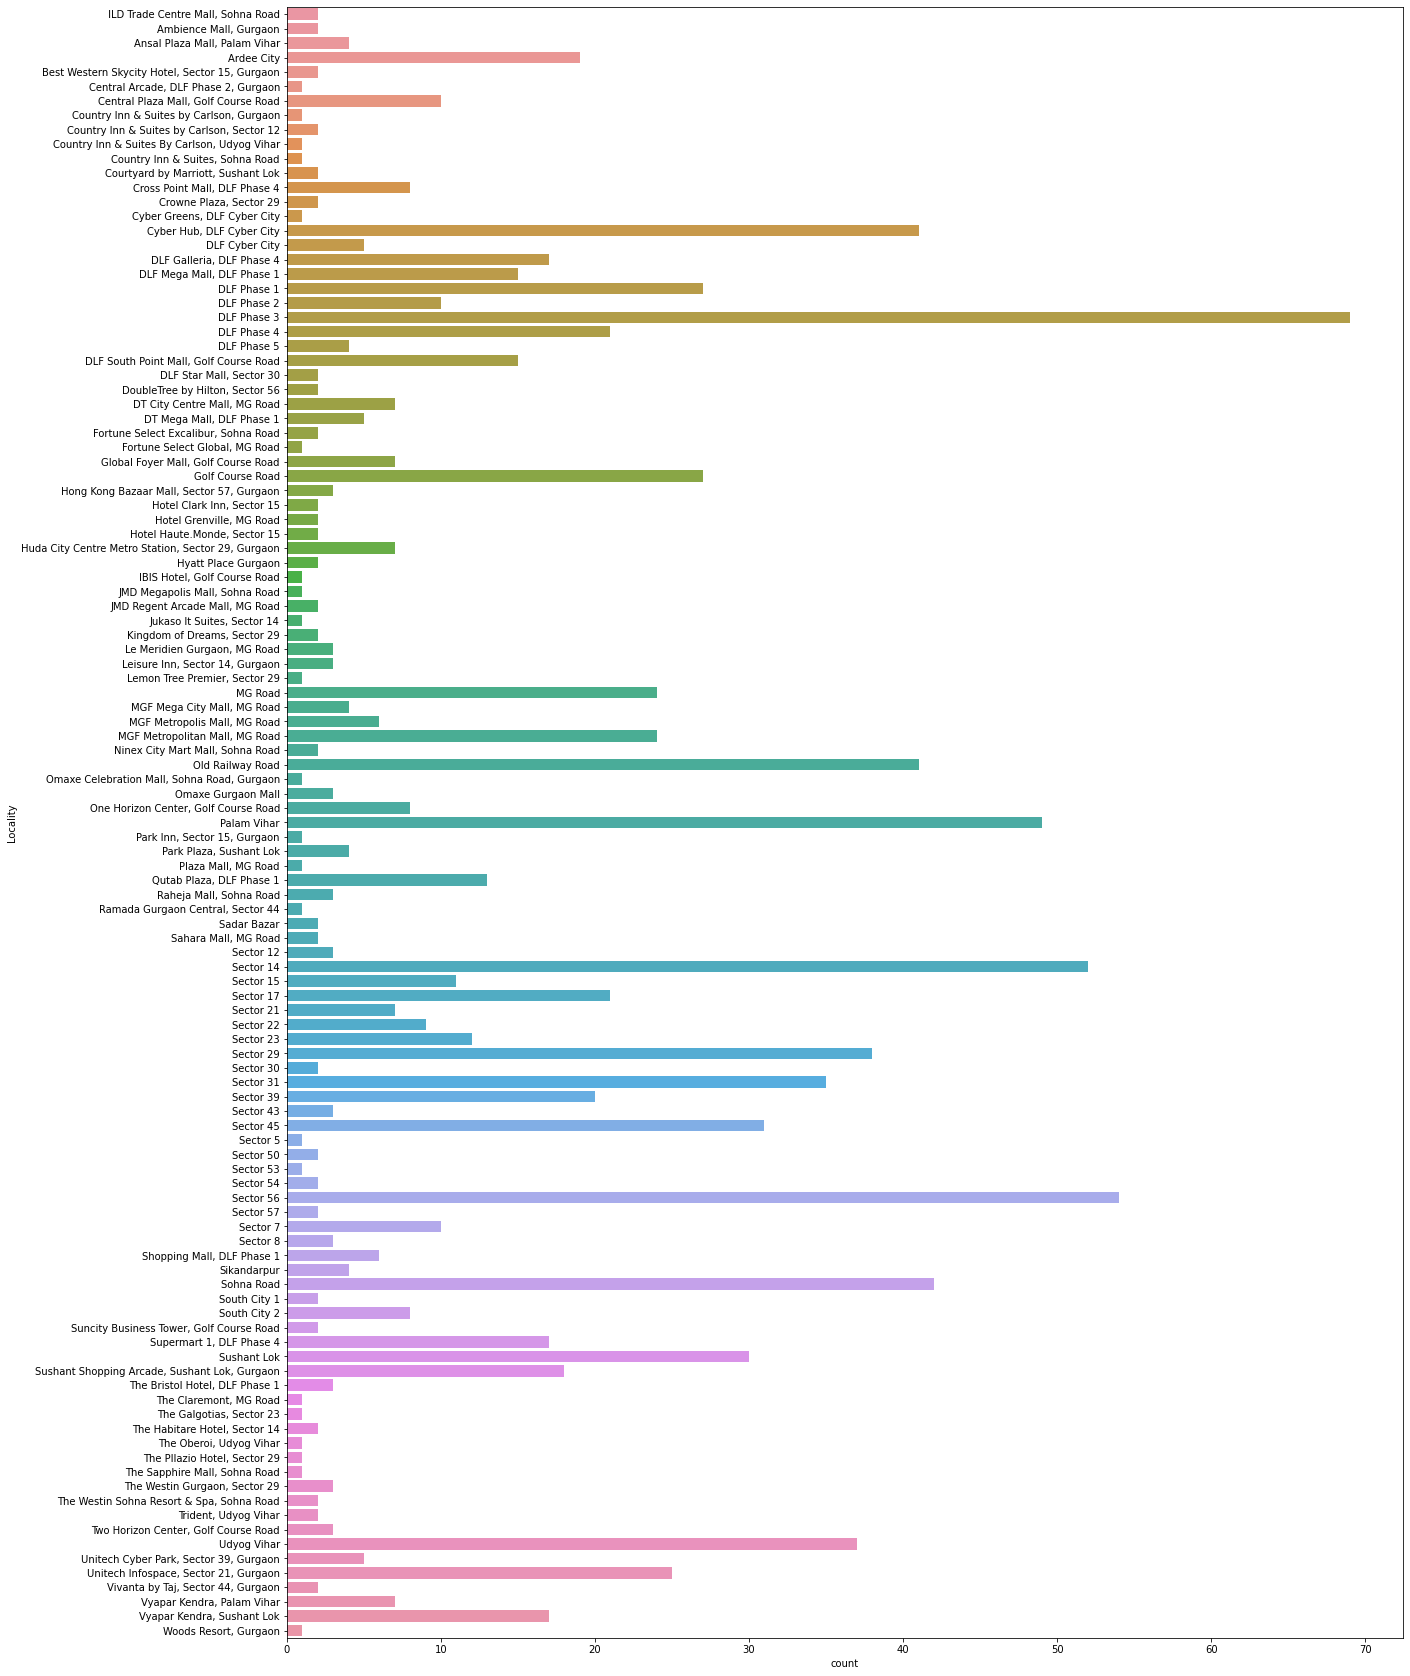

In [148]:
#countplot of localities
plt.figure(figsize=(20,30))
sns.countplot(y='Locality',data=gurgaon_df,orient='h')

In [149]:
#locality wise count of restaurant
category_counts=gurgaon_df['Locality'].value_counts().sort_values(ascending=False).head(30)

In [150]:
category_counts

DLF Phase 3                                      69
Sector 56                                        54
Sector 14                                        52
Palam Vihar                                      49
Sohna Road                                       42
Cyber Hub, DLF Cyber City                        41
Old Railway Road                                 41
Sector 29                                        38
Udyog Vihar                                      37
Sector 31                                        35
Sector 45                                        31
Sushant Lok                                      30
DLF Phase 1                                      27
Golf Course Road                                 27
Unitech Infospace, Sector 21, Gurgaon            25
MGF Metropolitan Mall, MG Road                   24
MG Road                                          24
Sector 17                                        21
DLF Phase 4                                      21
Sector 39   

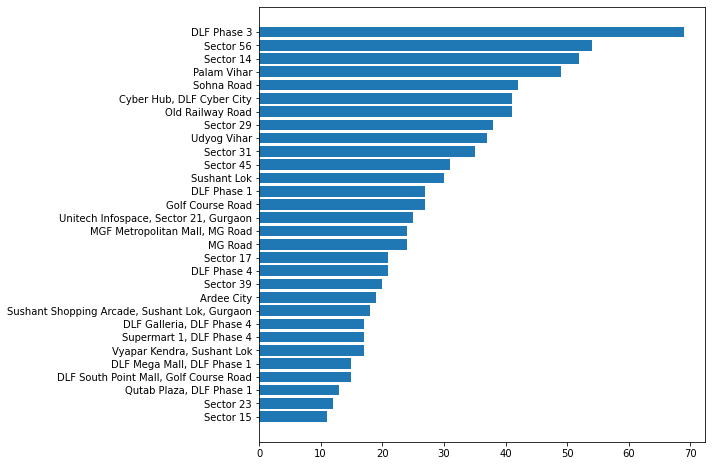

In [151]:
#countplot of top 30 localities
plt.figure(figsize=(8,8))
plt.barh(category_counts.index,category_counts)
plt.gca().invert_yaxis()
plt.show()

In [152]:
#count of different cuisines
gurgaon_df.Cuisines.value_counts().index

Index(['North Indian', 'North Indian, Chinese', 'Cafe',
       'North Indian, Mughlai', 'Bakery', 'Chinese', 'Fast Food',
       'Bakery, Desserts', 'North Indian, Mughlai, Chinese',
       'Pizza, Fast Food',
       ...
       'North Indian, Asian, European', 'European, Italian', 'Bengali',
       'North Indian, Italian, Mexican',
       'Finger Food, American, Continental, North Indian, Italian',
       'Korean, Japanese, Chinese, Asian',
       'Continental, Finger Food, Chinese, North Indian',
       'Mughlai, Hyderabadi', 'Chinese, North Indian, Italian, Continental',
       'Mithai, Street Food, South Indian, Chinese, North Indian'],
      dtype='object', length=362)

In [153]:
Cuisines_values=gurgaon_df.Cuisines.value_counts().values
Cuisines_labels=gurgaon_df.Cuisines.value_counts().index

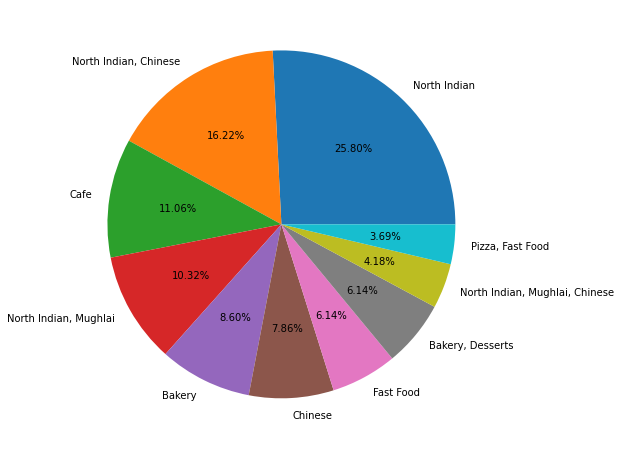

In [154]:
#pie chart of cuisines
plt.figure(figsize=(8,8))
plt.pie(Cuisines_values[:10],labels=Cuisines_labels[:10],autopct='%1.2f%%')
plt.show()

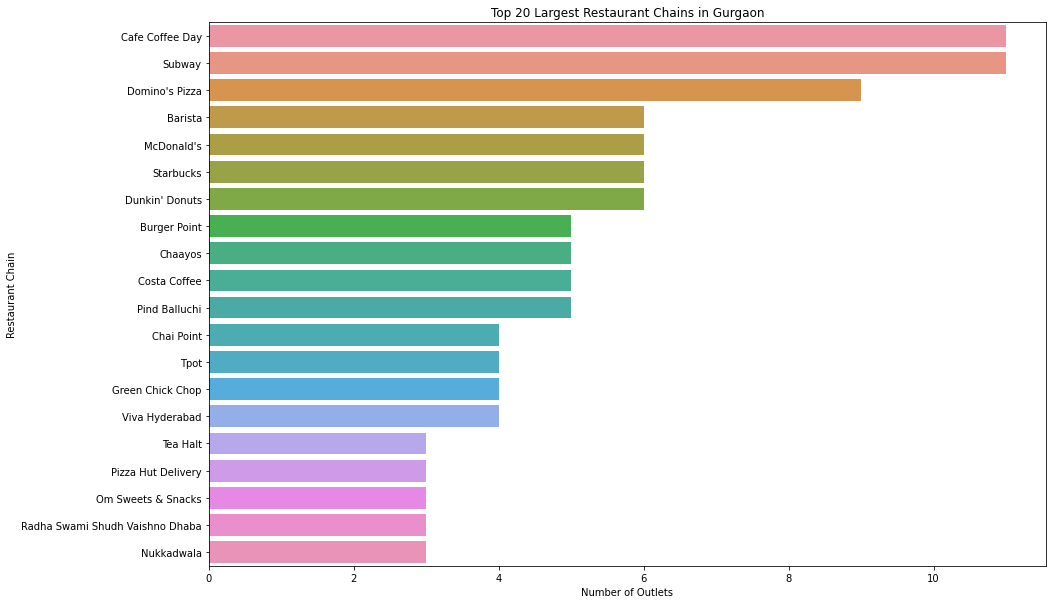

In [195]:
chains = gurgaon_df['Restaurant Name'].value_counts()[:90]
top_20_chains = chains[:20]

plt.figure(figsize=(15, 10))
sns.barplot(x=top_20_chains, y=top_20_chains.index)
plt.title("Top 20 Largest Restaurant Chains in Gurgaon")
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Chain")
plt.show()

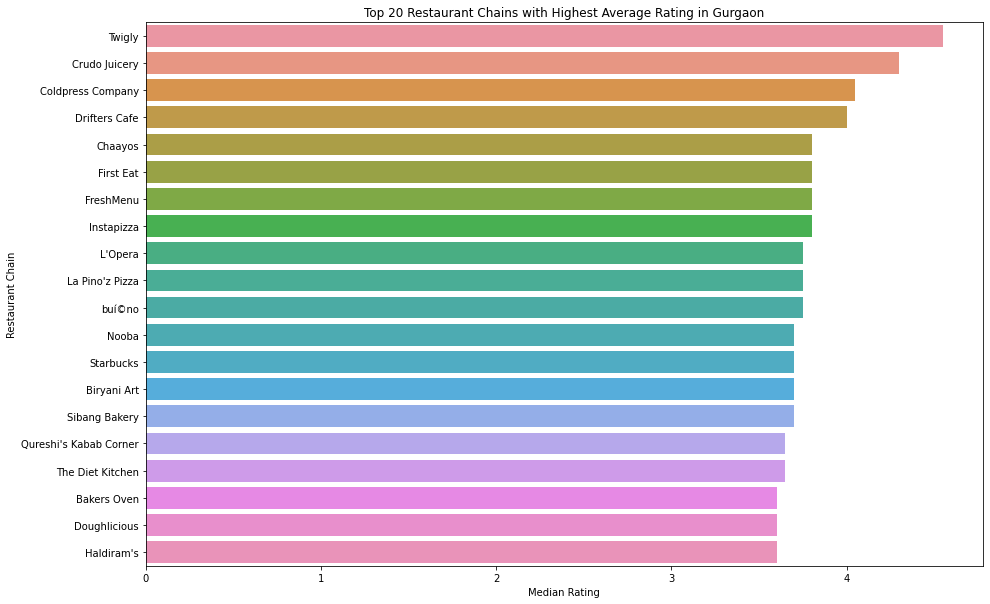

In [196]:
#highest rated restaurant chains in gurgaon
avg_ratings=gurgaon_df[gurgaon_df['Restaurant Name'].isin(chains.index)].groupby('Restaurant Name')['Aggregate rating'].median()
top_20_rated=avg_ratings.nlargest(20)
plt.figure(figsize=(15, 10))
sns.barplot(x=top_20_rated, y=top_20_rated.index)
plt.title("Top 20 Restaurant Chains with Highest Average Rating in Gurgaon")
plt.xlabel("Median Rating")
plt.ylabel("Restaurant Chain")
plt.show()

#### Observations:

1. Caterspoint is top rated restaurant and Aahar is the least rated restaurant in Gurgaon
2. DLF phase 3 has maximum number of restaurants followed by Sector 56 and Sector 14
3. North Indian is the most offered cuisine followed by Fast Food, Mughlai and Chinese
4. Cafe Coffee Day is the largest restaurant chain in Gurgaon with maximum number of outlets
5. Twigly is highest rated restaurant chain in Gurgaon

In [157]:
#recommend function for restaurant in gurgaon
def recommend_gurgaon(locality,cuisine,p1,p2):
    result=gurgaon_df[(gurgaon_df['Cuisines'].str.contains(cuisine))&(gurgaon_df['Locality'].str.contains(locality))&(gurgaon_df['Average Cost for two'].between(p1,p2))][['Restaurant Name','Aggregate rating']]
    result=result.sort_values(by='Aggregate rating',ascending=False)
    result=result.reset_index(drop=True)
    
    return(result)

In [158]:
#calling function
recommend_gurgaon('DLF Phase 3','North Indian',300,900)

,Restaurant Name,Aggregate rating
0,First Eat,4.0
1,Crazy Bhukkhad,3.9
2,Veg Ex,3.8
3,Deez Biryani & Kebabs,3.7
4,Fomads,3.6
5,ZASTY,3.5
6,Mom's Kitchen,3.5
7,Happy Beings,3.5
8,Surprise O Meal,3.4
9,Dabba Meat,3.4


In [159]:
#pickle file of dataframe
import pickle
with open('gurgaon.pkl','wb') as file:
    pickle.dump(gurgaon_df,file)

#### Noida

In [160]:
#defining noida dataframe 
noida_df=df[df['City']=='Noida']

In [161]:
#dataframe preview and dropping of irrelevant columns
noida_df=noida_df.reset_index()
noida_df=noida_df.drop(['index','Locality Verbose','City'],axis=1)
noida_df.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Ali Baba Caves,"Ansal Plaza Mall, Greater Noida",77.528129,28.458107,"Cafe, Chinese",500,No,No,No,No,2,3.1,Orange,Average,15
1,Cafí© Doo Ghoont,"Ansal Plaza Mall, Greater Noida",77.507456,28.463957,Cafe,600,No,Yes,No,No,2,3.4,Orange,Average,50
2,Knights Chaska,"Ansal Plaza Mall, Greater Noida",77.507834,28.464434,"North Indian, Chinese",800,Yes,No,No,No,2,2.9,Orange,Average,6
3,Thirsty Scholar Cafe,"Ansal Plaza Mall, Greater Noida",77.507701,28.464201,Cafe,450,No,No,No,No,1,3.2,Orange,Average,45
4,Savoury Street,"Ansal Plaza Mall, Greater Noida",77.507701,28.464201,"North Indian, Continental, Italian",600,No,No,No,No,2,0.0,White,Not rated,3


In [162]:
noida_df.to_excel('Noida.xlsx')

In [163]:
#number of unique values of cuisine
len(noida_df['Cuisines'].unique())

248

In [164]:
#unique localities
noida_df['Locality'].unique()

array(['Ansal Plaza Mall, Greater Noida', 'Brahmaputra Shopping Complex',
       'Centre Stage Mall, Sector 18',
       'DLF Mall of India, Sector 18,  Noida',
       'Fortune Inn Grazia, Sector 27, Noida',
       'Ganga Shopping Complex, Sector 29',
       'Gardens Galleria, Sector 38 Noida', 'Golf Course',
       'Greater Noida', 'Harsha Mall, Greater Noida',
       'Hotel Golf View, Sector 37, Noida',
       'Jaipuria Plaza, Sector 26, Noida',
       'Jaypee Greens Golf & Spa Resort, Surajpur',
       'Jaypee Greens, Greater Noida, Noida',
       'Logix City Centre, Sector 32, Noida',
       'Logix Cyber Park, Sector 62, Noida',
       'Mosaic Hotels, Sector 18, Noida ', 'MSX Mall, Greater Noida',
       'Park Ascent, Sector 62, Noida',
       'Park Plaza Hotel, Sector 55, Noida',
       'Radisson Blu, Sector 18, Noida', 'Sector 1', 'Sector 10',
       'Sector 11', 'Sector 110', 'Sector 12', 'Sector 125', 'Sector 127',
       'Sector 132', 'Sector 15', 'Sector 16', 'Sector 18', 'Sec

In [197]:
#fetching restaurant name and aggregate rating when loacality,cuisine and average cost for two is given according to maximum rating
result=noida_df[(noida_df['Cuisines'].str.contains('North'))&(noida_df['Locality'].str.contains('Sector 26'))&(noida_df['Average Cost for two'].between(600, 900))][['Restaurant Name','Aggregate rating']]
result=result.sort_values(by='Aggregate rating',ascending=False)
result.reset_index(drop=True,inplace=True)
result

,Restaurant Name,Aggregate rating
0,Zaika Hindustani,2.7
1,Saleem's Takeaway,2.6


In [166]:
#top 5 rated restaurant in noida
top_5_rated = noida_df.sort_values(by='Aggregate rating', ascending=False).head(5)
top_5_rated

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
17,The Big Chill Cakery,"DLF Mall of India, Sector 18, Noida",77.321880,28.567727,"Bakery, Desserts",700,No,No,No,No,2,4.5,Dark Green,Excellent,147
16,Oh So Stoned!,"DLF Mall of India, Sector 18, Noida",77.321039,28.568005,Desserts,250,No,No,No,No,1,4.5,Dark Green,Excellent,324
39,Mamagoto,"DLF Mall of India, Sector 18, Noida",77.320475,28.566485,"Asian, Thai, Chinese",1600,Yes,Yes,No,No,3,4.3,Green,Very Good,428
569,Desi Swag,Sector 37,77.340025,28.565312,"North Indian, Mughlai",500,No,Yes,No,No,2,4.3,Green,Very Good,96
568,Bistro 37,Sector 37,77.339741,28.565295,"Fast Food, Chinese",400,No,No,No,No,1,4.3,Green,Very Good,1005


In [167]:
#bottom 5 rated restaurant in noida
bottom_5_rated = noida_df[noida_df['Rating text'] != 'Not rated'].sort_values(by='Aggregate rating', ascending=True).head(5)
bottom_5_rated

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1073,Moti Mahal Delux Tandoori Trail,"The Great India Place, Sector 38",77.325445,28.567040,"North Indian, Mughlai",1200,Yes,Yes,No,No,3,2.0,Red,Poor,108
1072,Club Ice Cube,"The Great India Place, Sector 38",77.326475,28.568067,"North Indian, Continental, Chinese",2400,Yes,No,No,No,4,2.0,Red,Poor,230
1071,Chopaal,"The Great India Place, Sector 38",77.325308,28.567150,"Chinese, North Indian, South Indian, Fast Food",450,No,No,No,No,1,2.0,Red,Poor,161
499,Wah Ji Wah,Sector 27,77.328098,28.574339,North Indian,500,No,Yes,No,No,2,2.0,Red,Poor,74
979,Chawla's 2,Sector 72,77.373336,28.515425,"North Indian, Mughlai, Chinese",1400,No,Yes,No,No,3,2.1,Red,Poor,22


<AxesSubplot:xlabel='count', ylabel='Locality'>

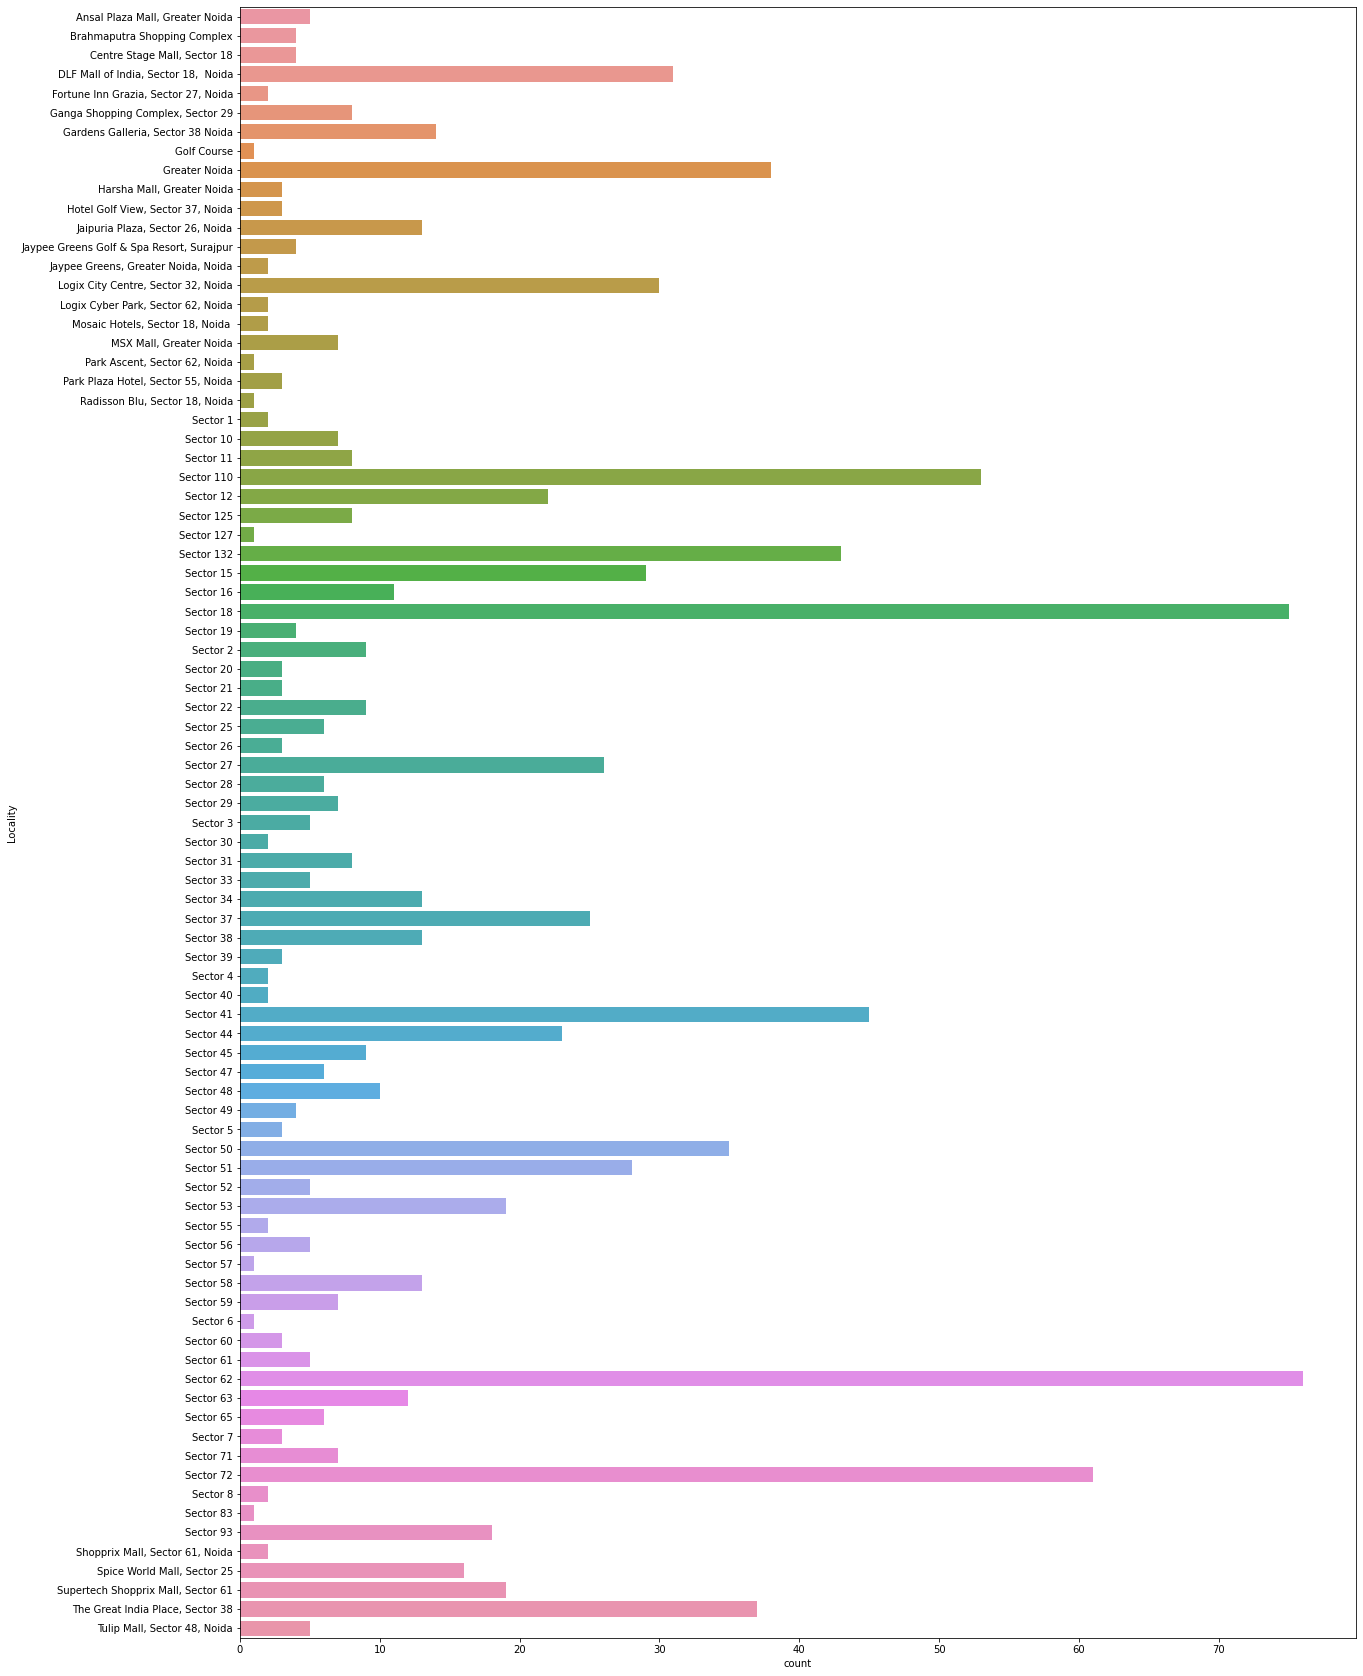

In [168]:
plt.figure(figsize=(20,30))
sns.countplot(y='Locality',data=noida_df,orient='h')

In [169]:
#locality wise count
category_counts=noida_df['Locality'].value_counts().sort_values(ascending=False).head(30)

In [170]:
category_counts

Sector 62                               76
Sector 18                               75
Sector 72                               61
Sector 110                              53
Sector 41                               45
Sector 132                              43
Greater Noida                           38
The Great India Place, Sector 38        37
Sector 50                               35
DLF Mall of India, Sector 18,  Noida    31
Logix City Centre, Sector 32, Noida     30
Sector 15                               29
Sector 51                               28
Sector 27                               26
Sector 37                               25
Sector 44                               23
Sector 12                               22
Supertech Shopprix Mall, Sector 61      19
Sector 53                               19
Sector 93                               18
Spice World Mall, Sector 25             16
Gardens Galleria, Sector 38 Noida       14
Sector 34                               13
Jaipuria Pl

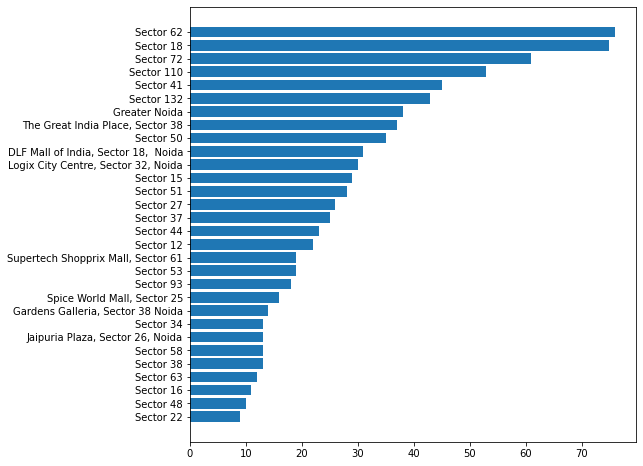

In [171]:
plt.figure(figsize=(8,8))
plt.barh(category_counts.index,category_counts)
plt.gca().invert_yaxis()
plt.show()

In [172]:
#count of different cuisines
noida_df.Cuisines.value_counts().index

Index(['North Indian', 'North Indian, Chinese', 'North Indian, Mughlai',
       'Chinese', 'Fast Food', 'North Indian, Mughlai, Chinese', 'Bakery',
       'Cafe', 'Bakery, Desserts', 'Ice Cream',
       ...
       'Bakery, Fast Food, Chinese', 'South Indian, North Indian, Street Food',
       'North Indian, Mughlai, Fast Food', 'Cafe, Bakery, Fast Food',
       'North Indian, Italian, Continental',
       'Mithai, North Indian, Street Food',
       'Continental, Chinese, North Indian, Indian',
       'North Indian, Chinese, Thai, Continental',
       'North Indian, Chinese, Mediterranean',
       'Chinese, North Indian, South Indian, Fast Food'],
      dtype='object', length=248)

In [173]:
Cuisines_values=noida_df.Cuisines.value_counts().values
Cuisines_labels=noida_df.Cuisines.value_counts().index

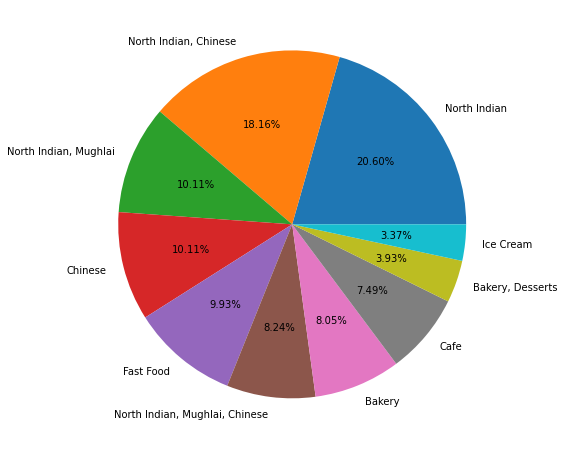

In [174]:
#pie chart of cuisines
plt.figure(figsize=(8,8))
plt.pie(Cuisines_values[:10],labels=Cuisines_labels[:10],autopct='%1.2f%%')
plt.show()

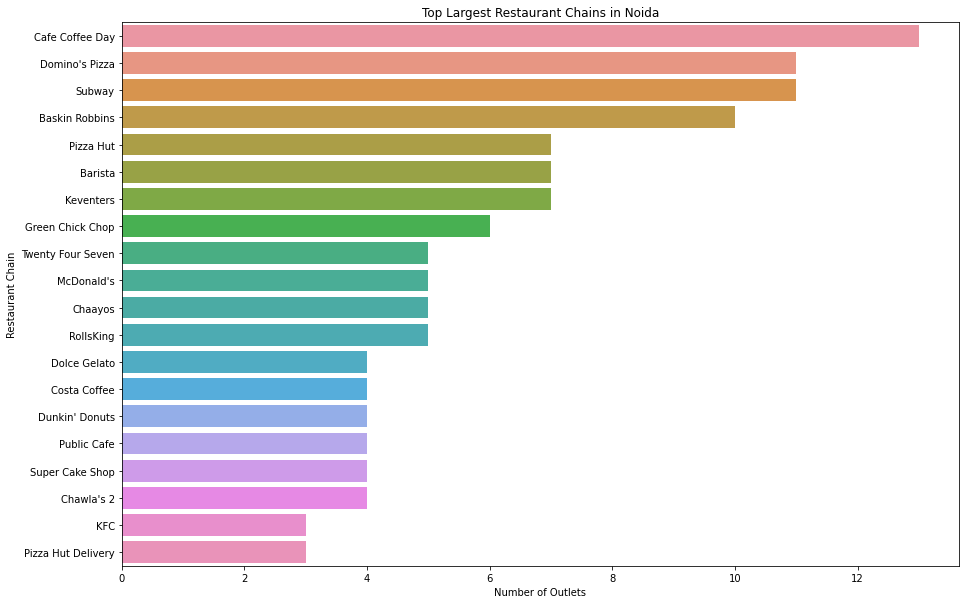

In [208]:
chains = noida_df['Restaurant Name'].value_counts()[:25]
top_20_chains = chains[:20]

plt.figure(figsize=(15, 10))
sns.barplot(x=top_20_chains, y=top_20_chains.index)
plt.title("Top Largest Restaurant Chains in Noida")
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Chain")
plt.show()

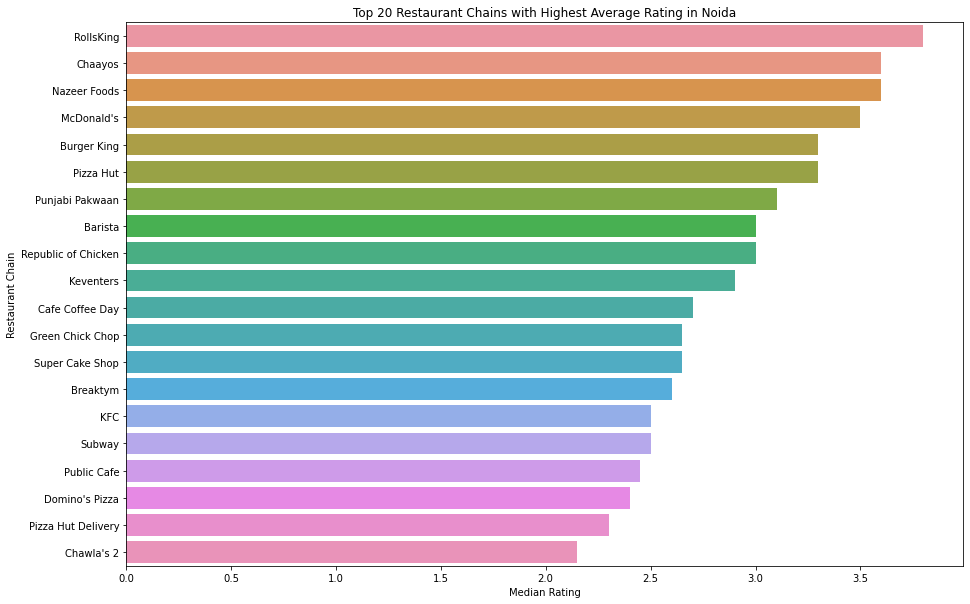

In [209]:
#plot of highest rated restaurant chains
avg_ratings=noida_df[noida_df['Restaurant Name'].isin(chains.index)].groupby('Restaurant Name')['Aggregate rating'].median()
top_20_rated=avg_ratings.nlargest(20)
plt.figure(figsize=(15, 10))
sns.barplot(x=top_20_rated, y=top_20_rated.index)
plt.title("Top 20 Restaurant Chains with Highest Average Rating in Noida")
plt.xlabel("Median Rating")
plt.ylabel("Restaurant Chain")
plt.show()

#### Observations:

1. The Big Chill Cakery is the top rated restaurant and Moti Mahal Delux is the least rated restaurant in Noida
2. Sector 62 has maximum number of restaurants followed by Sector 18 and Sector 72
3. North Indian is the most offered cuisine followed by Mughlai and Chinese
4. Cafe Coffee day is the largest restaurant chain in Noida with maximum number of outlets
5. RollsKing is highest rated restaurant chain in Noida

In [177]:
#recommend function for restaurant in noida
def recommend_noida(locality,cuisine,p1,p2):
    result=noida_df[(noida_df['Cuisines'].str.contains(cuisine))&(noida_df['Locality'].str.contains(locality))&(noida_df['Average Cost for two'].between(p1,p2))][['Restaurant Name','Aggregate rating']]
    result=result.sort_values(by='Aggregate rating',ascending=False)
    result=result.reset_index(drop=True)
    
    return(result)

In [178]:
#calling function
recommend_noida('Sector 62','North Indian',300,800)

,Restaurant Name,Aggregate rating
0,Rollmaal,3.4
1,World Bites,3.4
2,Malabar Junction,3.3
3,Rasoi99,3.2
4,Food Brigade,3.2
5,Cafe Green Apple,3.2
6,MS Foods,3.1
7,The Hunger Cure,3.0
8,Boxmeal,3.0
9,Pichli Gali,3.0


In [179]:
#pickle file of the dataframe
import pickle
with open('noida.pkl','wb') as file:
    pickle.dump(noida_df,file)